# WeRateDogs Analysis

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

%matplotlib inline

dg = pd.read_csv('data/tw_clean.csv')
dg.head()

,tweet_id,tweet_time,tweet_text,tweet_source,favorite_count,retweet_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_time,dog_name,dog_stage,dog_numer,dog_denom,dog_rating,predicted_breed,breed_conf
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,iphone,39467.0,8853.0,NaN,NaN,NaN,NaN,NaN,Phineas,NaN,13,10,1.3,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,iphone,33819.0,6514.0,NaN,NaN,NaN,NaN,NaN,Tilly,NaN,13,10,1.3,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,iphone,25461.0,4328.0,NaN,NaN,NaN,NaN,NaN,Archie,NaN,12,10,1.2,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,iphone,42908.0,8964.0,NaN,NaN,NaN,NaN,NaN,Darla,NaN,13,10,1.3,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,iphone,41048.0,9774.0,NaN,NaN,NaN,NaN,NaN,Franklin,NaN,12,10,1.2,basset,0.555712


First, let's examine a simple correlation between favorites ("likes") and retweets. 

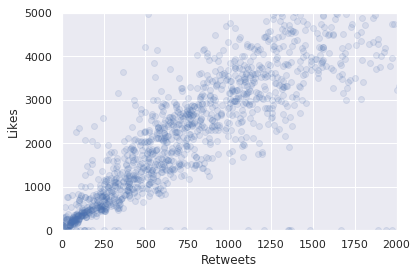

In [173]:
plt.scatter(data = dg, x = 'retweet_count', y = 'favorite_count', alpha = 1/8)
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.xlim(0,2000)
plt.ylim(0,5000);

We see a close correlation, which is expected. There's also a number of posts that are heavily retweeted, but with no favorites. This may point to missing data, and should be reviewed in further gather/assess/clean iterations.

Next, let's examine likes and retweets over time.

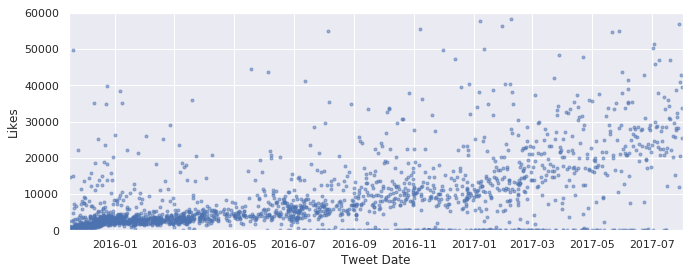

In [174]:
sns.set(rc={'figure.figsize':(11, 4)})
pydates = dg.copy()
pydates['tweet_time'] = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in pydates.tweet_time ] 
ax = pydates.plot(marker='.', alpha=0.5, x='tweet_time', y='favorite_count',
            linestyle='None', legend=False, ylim=(0,60000))
ax.set_xlabel("Tweet Date")
ax.set_ylabel("Likes");

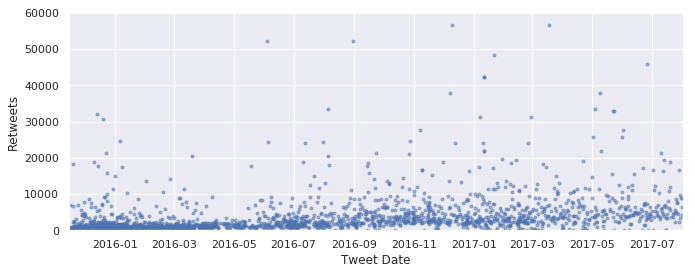

In [175]:
ax = pydates.plot(marker='.', alpha=0.5, x='tweet_time', y='retweet_count',
            linestyle='None', legend=False, ylim=(0,60000))
ax.set_xlabel("Tweet Date")
ax.set_ylabel("Retweets");

Interestingly, we see that retweets have stayed fairly constant, while likes have steadily increased. This may indicate increasing popularity of the WeRateDogs Twitter account.

What about the dogs themselves? Let's examine dog ratings, the self-assessments given in terms of a numerator and denominator (ie, "14/10"):

In [176]:
dg.dog_rating.value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
42.000000       2
0.818182        2
1.500000        2
0.000000        2
7.500000        2
1.250000        1
66.600000       1
2.600000        1
177.600000      1
0.636364        1
18.200000       1
0.733333        1
1.700000        1
3.428571        1
2.700000        1
Name: dog_rating, dtype: int64

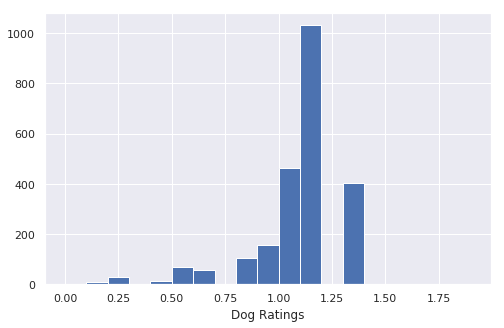

In [177]:
plt.figure(figsize=[8,5])

binsize = 0.1
bins = np.arange(0, 2, binsize)
plt.hist(data = dg[ dg.dog_rating < 7 ], x='dog_rating', bins=bins)
plt.xlabel('Dog Ratings')
plt.show();

Most ratings are clustered around 1; specifically, slightly more than 1, indicating the popularity of rankings 11/10 - 14/10. Have these ratings changed over time?

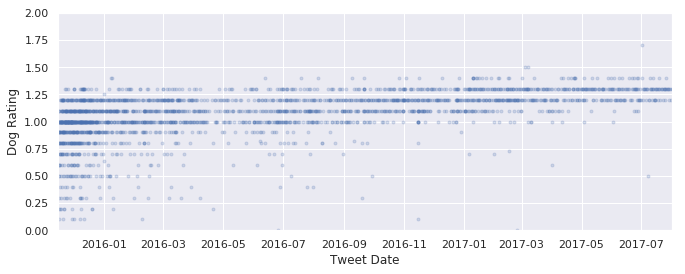

In [178]:
ax = pydates.plot(marker='.', alpha=0.2, x='tweet_time', y='dog_rating',
            linestyle='None', legend=False, ylim=(0,2))
ax.set_xlabel("Tweet Date")
ax.set_ylabel("Dog Rating");

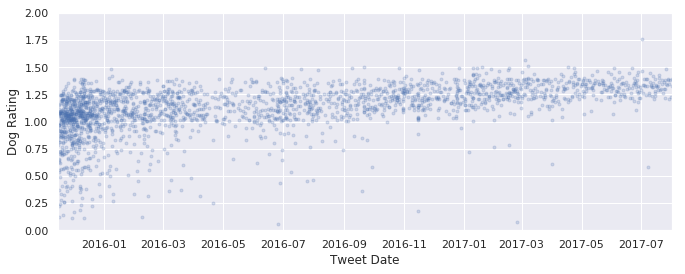

In [179]:
jitter = np.arange(0, 0.1, 0.001)

ratings = pydates.copy()
ratings['dog_rating'] = [r + np.random.choice(jitter) for r in ratings.dog_rating ]
ax = ratings.plot(marker='.', alpha=0.2, x='tweet_time', y='dog_rating',
            linestyle='None', legend=False, ylim=(0,2))
ax.set_xlabel("Tweet Date")
ax.set_ylabel("Dog Rating");

Adding some jitter to the plot decreases banding and overplotting, and highlights an interesting trend: over time, ratings are gradually increasing, and are showing smaller variance.

Finally, we will check to see if there is any correlation between self-ratings, and likes or retweets.

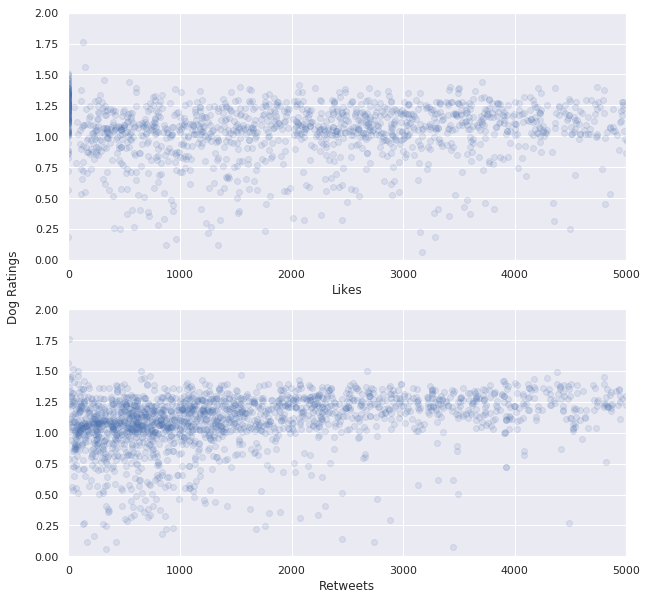

In [181]:
fig, ax = plt.subplots(nrows=2, figsize=(10,10))
fig.text(0.04, 0.5, 'Dog Ratings', va='center', rotation='vertical')

ax[0].scatter(data = ratings, x = 'favorite_count', y = 'dog_rating', alpha = 1/8)
ax[0].set_xlabel('Likes')
ax[0].set_ylim(0,2)
ax[0].set_xlim(0,5000)
ax[1].scatter(data = ratings, x = 'retweet_count', y = 'dog_rating', alpha = 1/8)
ax[1].set_xlabel('Retweets')
ax[1].set_ylim(0,2)
ax[1].set_xlim(0,5000);

## Insights
Twitter posts by WeRateDogs are consistently enjoyed. While the dogs are rated positively or negatively (mostly positively), their rating doesn't seem to have any influence over whether their audience likes or retweets them. Likes and retweets seem uniformly distributed, with the rate of likes increasing over time, possibly due to the increasing popularity of the WeRateDogs account. As the account has matured, we see the dog ratings steadily increasing, with fewer negative ratings. This may be due to increased popularity, or a greater adherence to group norms, or perhaps because they are all just good dogs.